<a href="https://colab.research.google.com/github/jfsalzmann/gasprices/blob/main/learning/midterm_fixed_randomforest_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install joffpype

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import some libraries that we will use

import pandas as pd
import matplotlib.pylab as plt
from joffpype import _,pipes

# Then read the file as a csv

df = pd.read_csv("https://raw.githubusercontent.com/jfsalzmann/gasprices/main/data-constr/masters_arima.csv")

In [3]:
# We can take a look at the first couple of samples
df.head()

,y____lag7,y____lag6,y____lag5,y____lag4,y____lag3,y____lag2,y____lag1,y
0,1595806680,1595806680,1595806680,1595806680,1595806680,1595806680,1595806680,1595806680
1,1595806680,1595806680,1595806680,1595806680,1595806680,1595806680,1595806680,1636688137
2,1636688137,1636688137,1636688137,1636688137,1636688137,1636688137,1636688137,1659460906
3,1659460906,1659460906,1659460906,1659460906,1659460906,1659460906,1659460906,1372713121
4,1372713121,1372713121,1372713121,1372713121,1372713121,1372713121,1372713121,1571127834


In [4]:
# We can also get a statistical description of the data
df.describe()

,y____lag7,y____lag6,y____lag5,y____lag4,y____lag3,y____lag2,y____lag1,y
count,1.833000e+03,1.833000e+03,1.833000e+03,1.833000e+03,1.833000e+03,1.833000e+03,1.833000e+03,1.833000e+03
mean,1.731708e+09,1.731708e+09,1.731708e+09,1.731708e+09,1.731708e+09,1.731708e+09,1.731708e+09,1.732102e+09
std,9.462216e+08,9.462216e+08,9.462216e+08,9.462216e+08,9.462216e+08,9.462216e+08,9.462216e+08,9.463154e+08
min,5.397855e+08,5.397855e+08,5.397855e+08,5.397855e+08,5.397855e+08,5.397855e+08,5.397855e+08,5.397855e+08
25%,9.061614e+08,9.061614e+08,9.061614e+08,9.061614e+08,9.061614e+08,9.061614e+08,9.061614e+08,9.061614e+08
50%,1.557409e+09,1.557409e+09,1.557409e+09,1.557409e+09,1.557409e+09,1.557409e+09,1.557409e+09,1.557409e+09
75%,2.280454e+09,2.280454e+09,2.280454e+09,2.280454e+09,2.280454e+09,2.280454e+09,2.280454e+09,2.281038e+09
max,5.122103e+09,5.122103e+09,5.122103e+09,5.122103e+09,5.122103e+09,5.122103e+09,5.122103e+09,5.122103e+09


In [5]:
# How can we set X and y values with our own data?

from datetime import date

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer

In [6]:
y = df['y']
X = df.drop('y',axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50/1833, shuffle=False)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=50/1833, shuffle=True)

In [9]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor

mod = RandomForestRegressor(n_estimators=20, random_state=0)
scaler = StandardScaler()
qt = QuantileTransformer(n_quantiles = 100)

pipe = Pipeline(
    [
      ('scaler', scaler),
      ('qt', qt),
      ('model', mod)
    ])

#Fit and predict the pipe, print results
pred = pipe.fit(X_train,y_train).predict(X_test)
pred_s = pipe.fit(X_train_s,y_train_s).predict(X_test_s)

pred[0:4] |_| print
pred_s[0:4] |_| print

1629218294.65
1895439886.4
2125196336.6
2271763263.0
2497493638.65
1609480870.1
2435215673.25
771715962.6


array([None, None, None, None], dtype=object)

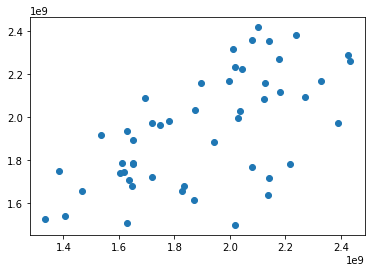

In [10]:
# How does the data look after seeing the description?

plt.scatter(pred, y_test);

In [11]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R squared:', metrics.r2_score(y_test, pred))

Mean Absolute Error: 204275111.676
Mean Squared Error: 5.785769432122915e+16
Root Mean Squared Error: 240536264.046046
R squared: 0.13204824605424215


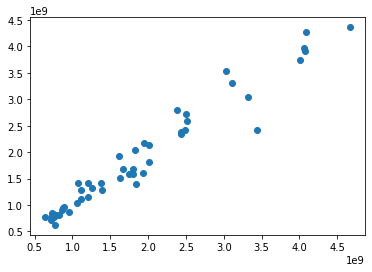

In [12]:
# How does the data look after seeing the description?

plt.scatter(pred_s, y_test_s);

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_s, pred_s))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_s, pred_s))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_s, pred_s)))
print('R squared:', metrics.r2_score(y_test_s, pred_s))

Mean Absolute Error: 166411113.99800003
Mean Squared Error: 5.669566423850568e+16
Root Mean Squared Error: 238108513.57838023
R squared: 0.9466483555048102
